# Movie Reviews Classification
  * Positive
  * Neutral
  * Negative

## Data cleaning

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in round  brackets, remove new line character, remove punctuation and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[·–‘’“”…]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip()

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = ['film', 'movie', 'story', 'show', 'character', 'one', 'like']
stop_words.extend(stopwords.words('english'))

def clean_text_round2(text):
    '''Remove stop words'''
    # Create a regex pattern to match stop words
    pattern = r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b'
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [ ]:
wnet = nltk.stem.WordNetLemmatizer()

def lemmtization(text):
    '''Lemmtization'''
    words = text.split(' ')
    lemmatized_words = [wnet.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [ ]:
from nltk import word_tokenize, pos_tag

list_except = ['dont', 'doesnt', 'didnt', 'cant', 'couldnt', 'shouldnt', 'isnt', 'arent', 'hasnt', 'havent' 'wont']
def remove_nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if not is_noun(pos) & (word not in list_except)]
    return ' '.join(all_nouns)

In [ ]:
def clean_data(text):
    text_r1 = clean_text_round1(text)
    text_r2 = clean_text_round2(text_r1)
    text_lem = lemmtization(text_r2)
    text_cleaned = remove_nouns(text_lem)
    return text_cleaned

## Load from drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


### Bi-LSTM

In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/model/tokenizer.json' '/content'

In [ ]:
from keras.preprocessing.text import tokenizer_from_json

with open('tokenizer.json', 'r') as json_file:
    loaded_tokenizer_json = json_file.read()

tokenizer = tokenizer_from_json(loaded_tokenizer_json)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
embedding_dim = 64
max_length = 500

analyzer = lambda text : text.strip().split(' ')
tokenizer.num_words=vocab_size
tokenizer.split = ' '
tokenizer.oov_token="<OOV>"
tokenizer.analyzer=analyzer

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/model/model_checkpoint.h5")
model.summary()

### DistilBERT

In [ ]:
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/model/TFDistilBert_model.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 distilbert (TFDistilBertMa  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 inLayer)                    den_state=(None, 256, 768)   0          'attention_mask[0][0]']      
                             , hidden_states=None, atte                                       

## Test on new data

In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data_collection/retrive_raw_corpus_full_data.csv' '/content'

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_csv('/content/retrive_raw_corpus_full_data.csv')

In [ ]:
test_data = ['i kind of liked the movie, the acting was quite good',
             'i can compare this movie to garbage even a kids story would be better than this so horrible',
             'i really love the movie']
test_data = list(map(clean_data, test_data))
test_data

['liked acting quite good', 'even kid would better horrible', 'really love']

### Bi-LSTM

In [ ]:
test_data = tokenizer.texts_to_sequences(test_data)
padded_test_data = pad_sequences(test_data, maxlen=max_length, truncating='post', padding='post')
print(padded_test_data.shape)

y_pred = model.predict(padded_test_data)
y_pred = np.argmax(y_pred, axis=1)
classes = ['positive', 'neutral', 'negative']
y_pred = [classes[i] for i in y_pred]
print(y_pred)

### DistillBERT

In [ ]:
import tensorflow as tf
import numpy as np

max_length = 256

def prepare_data(input_data, tokenizer):
  ids = np.zeros((len(input_data), max_length))
  masks = np.zeros((len(input_data), max_length))
  for i, text in enumerate(input_data):
      tokenized_text = tokenizer.encode_plus(
          text,
          max_length=max_length,
          truncation=True,
          padding='max_length',
          add_special_tokens=True,
          return_tensors='tf'
      )
      ids[i, :] = tokenized_text.input_ids
      masks[i, :] = tokenized_text.attention_mask
  return ids, masks

In [ ]:
X_input_ids, X_attn_masks = prepare_data(test_data, tokenizer)
(X_input_ids.shape, X_attn_masks.shape)

((3, 256), (3, 256))

In [ ]:
a = {'input_ids': X_input_ids, 'attention_mask': X_attn_masks}

In [ ]:
y_pred = model.predict(a)
print(y_pred)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
classes = ['positive', 'neutral', 'negative']
y_pred = [classes[i] for i in y_pred]
print(y_pred)

1/1 [==============================] - 0s 67ms/step
[[7.6545556e-03 8.9865893e-01 9.3686573e-02]
 [8.1373862e-08 1.9841760e-03 9.9801576e-01]
 [5.6879020e-01 7.6946177e-02 3.5426363e-01]]
[1 2 0]
['neutral', 'negative', 'positive']


## Explain by LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=95eb37c6af5d05ef2571f8941da495bfb8dfb0d371272cd896c36f9c44962585
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=['Positive', 'Neutral', 'Negative'])

### DistillBERT

In [ ]:
def predict_prob(texts):
    X_input_ids, X_attn_masks = prepare_data(texts, tokenizer)
    a = {'input_ids': X_input_ids, 'attention_mask': X_attn_masks}
    preds = model.predict(a)
    return preds

#### Positive

In [ ]:
test_data = data[data['Label'] == 'positive'].sample(1)
sentence = list(test_data['Review'])[0]
sentence

In [ ]:
sentence = "This movie is amazing in so many ways! Cinematography, special effects, story, acting. \
The ending scene was also very enlightening. It's won some awards too, all well deserved."

In [ ]:
sentence = clean_data(sentence)
print(sentence)
exp = explainer.explain_instance(
    sentence,
    predict_prob, labels=(0,1,2), num_features=len(sentence.split(' ')), num_samples=500)
exp.available_labels()

amazing many special acting ending also enlightening award well deserved
16/16 [==============================] - 4s 262ms/step


[0, 1, 2]

In [ ]:
predicted_label = np.argmax(predict_prob([sentence]))
print(predicted_label, classes[predicted_label])

1/1 [==============================] - 0s 32ms/step
0 positive


In [ ]:
exp.as_list(label=predicted_label)

[('award', 0.16661383592352408),
 ('amazing', 0.12323751020045898),
 ('enlightening', 0.09836219927269217),
 ('also', 0.061710799445116545),
 ('well', 0.06144778636800381),
 ('deserved', 0.038735398072380876),
 ('ending', 0.03808393637408324),
 ('acting', 0.0277350036609212),
 ('special', 0.026584333028398306),
 ('many', 0.021715348414708333)]

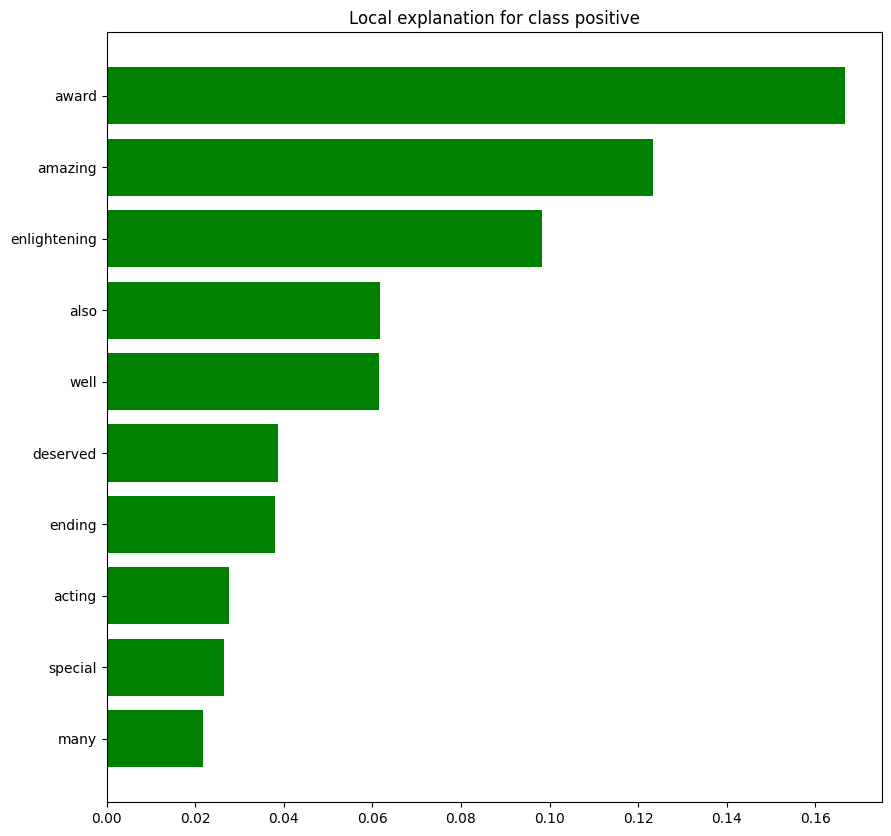

In [ ]:
import matplotlib.pyplot as plt

ex = exp.as_list(label=predicted_label)
ex = [(word, weight) for word, weight in ex if weight > 0]
fig = plt.figure(figsize=(10,10))
vals = [x[1] for x in ex]
names = [x[0] for x in ex]
vals.reverse()
names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = np.arange(len(ex)) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
title = 'Local explanation for class ' + classes[predicted_label]
plt.title(title)
plt.show()

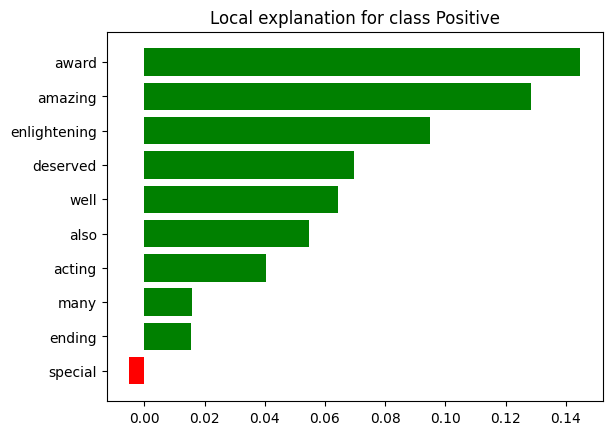

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=predicted_label)
plt.show()

In [ ]:
exp.show_in_notebook(labels=[predicted_label], show_predicted_value=True)

#### Negative

In [ ]:
test_data = data[data['Label'] == 'negative'].sample(1)
sentence = list(test_data['Review'])[0]
sentence

"Zombie make up isn't scary, The plot is predictable. In 10 minutes you will feel bored. Better watching another movie. The origin of the virus makes little sense. Instead of watching this film, I recommend watching the last of us zombie series. This film is less tense and quite torturous to watch. Usually when I watch a movie, a lot of emotions are captured. In this film I don't feel any emotion and just feel disgusted with the zombie makeup. Like, really?? It's not scary But this is disgusting. Only blood flowing and black contact lenses. Moral: look at the ratings before watching a movie. So as not to be deceived."

In [ ]:
sentence = "Zombie make up isn't scary, The plot is predictable. In 10 minutes you will feel bored. \
Better watching another movie. The origin of the virus makes little sense. Instead of watching this film, \
I recommend watching the last of us zombie series. This film is less tense and quite torturous to watch. \
Usually when I watch a movie, a lot of emotions are captured. In this film I don't feel any emotion and \
just feel disgusted with the zombie makeup. Like, really?? It's not scary But this is disgusting. \
Only blood flowing and black contact lenses. Moral: look at the ratings before watching a movie. \
So as not to be deceived."

In [ ]:
sentence = clean_data(sentence)
print(sentence)
exp = explainer.explain_instance(
    sentence,
    predict_prob, labels=(0,1,2), num_features=len(sentence.split(' ')), num_samples=500)
exp.available_labels()

make isnt scary predictable bored better watching another make little instead watching watching last u tense quite torturous usually watch captured dont disgusted zombie really scary disgusting flowing black lens moral deceived
16/16 [==============================] - 5s 279ms/step


[0, 1, 2]

In [ ]:
predicted_label = np.argmax(predict_prob([sentence]))
print(predicted_label, classes[predicted_label])

1/1 [==============================] - 0s 49ms/step
2 negative


In [ ]:
exp.as_list(label=predicted_label)

[('disgusting', 0.2808833877322521),
 ('quite', -0.22323596149058345),
 ('watching', 0.1739118043855618),
 ('deceived', 0.1418247218305009),
 ('torturous', 0.13423300232931962),
 ('make', 0.12409955765084242),
 ('instead', 0.0885231782936885),
 ('last', -0.08058567630107519),
 ('tense', -0.08054556074342209),
 ('better', -0.07778929066791523),
 ('predictable', -0.0666774912312307),
 ('little', -0.06154657366871934),
 ('zombie', -0.053423766854826533),
 ('isnt', -0.04822035635552349),
 ('watch', 0.046540830763159624),
 ('usually', -0.04631906253625668),
 ('disgusted', 0.0458471939758212),
 ('scary', 0.04045304192214555),
 ('bored', 0.039339097315305105),
 ('really', -0.026253654573586176),
 ('u', -0.025235054473401165),
 ('captured', -0.019834017915601646),
 ('moral', -0.01883107267025077),
 ('dont', 0.010384362653733483),
 ('flowing', 0.007930496770409075),
 ('lens', 0.00684302514759232),
 ('another', 0.00671938237720246),
 ('black', 0.002241128841517696)]

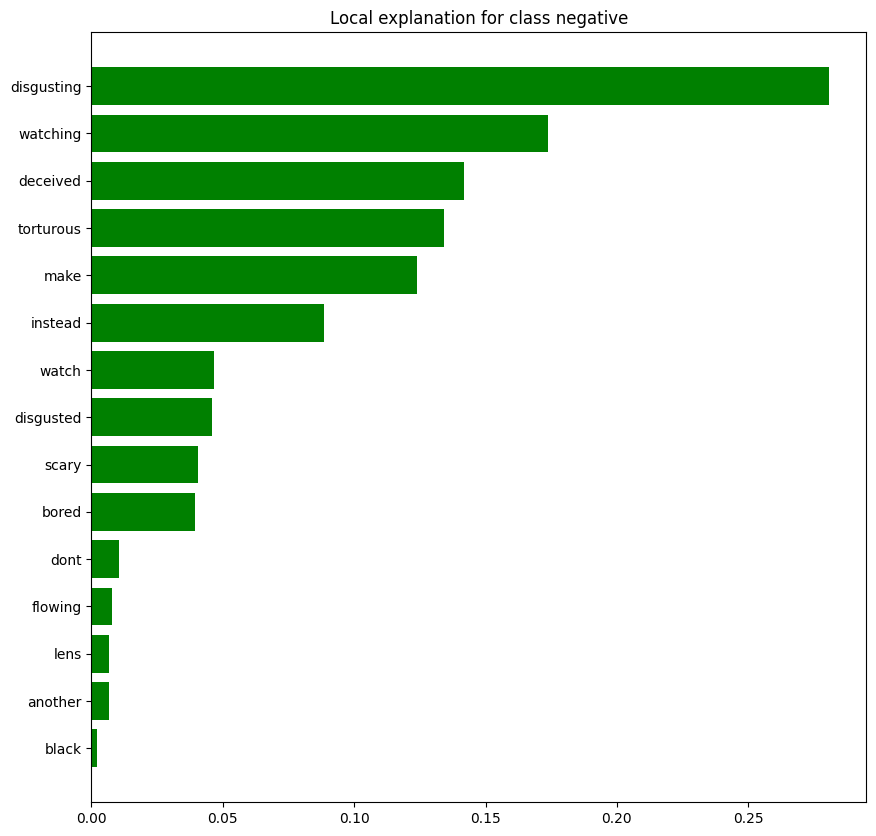

In [ ]:
import matplotlib.pyplot as plt

ex = exp.as_list(label=predicted_label)
ex = [(word, weight) for word, weight in ex if weight > 0]
fig = plt.figure(figsize=(10,10))
vals = [x[1] for x in ex]
names = [x[0] for x in ex]
vals.reverse()
names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = np.arange(len(ex)) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
title = 'Local explanation for class ' + classes[predicted_label]
plt.title(title)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=predicted_label)
plt.show()

In [ ]:
exp.show_in_notebook(labels=[predicted_label], show_predicted_value=True)

#### Neutral

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_csv('/content/retrive_raw_corpus_full_data.csv')
test_data = data[data['Label'] == 'neutral'].sample(1)
sentence = list(test_data['Review'])[0]
sentence

"I thought the movie lacked rhythm. That's to say I didn't think it flowed along at a comfortable or consistent pace. The story was OK but somewhat laking in realism.What really struck me is Devon Sawa's likeness to Steve McQueen. That's a real compliment considering Steve McQueen is amongst my favourite movie stars. Sawa's acting was good and if it weren't for him I would have rated this B-movie much lower. As per usual (of late) Bruce Willis's small role didn't add anything to the movie. I think he just takes whatever part is offered just to earn a few extra bucks. It's time for him to quit now. All in all an average action movie."

In [ ]:
sentence = "I thought the movie lacked rhythm. That's to say I didn't think it flowed along at a comfortable or \
consistent pace. The story was OK but somewhat laking in realism. What really struck me is \
Devon Sawa's likeness to Steve McQueen. That's a real compliment considering Steve McQueen \
is amongst my favourite movie stars. Sawa's acting was good and if it weren't for him I would have rated this B-movie \
much lower. As per usual (of late) Bruce Willis's small role didn't add anything to the movie. \
I think he just takes whatever part is offered just to earn a few extra bucks. It's time for him to quit now. \
All in all an average action movie."

In [ ]:
sentence = clean_data(sentence)
print(sentence)
exp = explainer.explain_instance(
    sentence,
    predict_prob, labels=(0,1,2), num_features=len(sentence.split(' ')), num_samples=500)
exp.available_labels()

lacked rhythm say didnt think flowed along comfortable consistent somewhat laking realismwhat really struck steve real considering steve mcqueen amongst favourite acting good would rated bmovie much lower per usual willis small didnt add think take whatever offered earn extra quit average
16/16 [==============================] - 5s 280ms/step


[0, 1, 2]

In [ ]:
predicted_label = np.argmax(predict_prob([sentence]))
print(predicted_label, classes[predicted_label])

1/1 [==============================] - 0s 46ms/step
1 neutral


In [ ]:
exp.as_list(label=predicted_label)

[('average', 0.16463136767276365),
 ('quit', -0.07877916322788545),
 ('struck', 0.07225316143149968),
 ('mcqueen', 0.06058009870238639),
 ('say', -0.05565043297108384),
 ('flowed', 0.05487189525223941),
 ('bmovie', -0.050237887916873565),
 ('consistent', 0.0455771058974329),
 ('willis', 0.04491294995191586),
 ('realismwhat', -0.04300912906612969),
 ('didnt', 0.04296277562591479),
 ('earn', -0.041315884006133806),
 ('favourite', 0.04024560494071616),
 ('usual', 0.039465050722487974),
 ('laking', -0.03365382052437339),
 ('lower', 0.030753699803953483),
 ('whatever', 0.02937783869483278),
 ('add', 0.027458335247211058),
 ('real', 0.0258673645770634),
 ('think', -0.025783080891060586),
 ('extra', 0.02314359137784038),
 ('rated', -0.02094018898003156),
 ('per', 0.020461015560791933),
 ('small', 0.020460332528672444),
 ('much', 0.02021431406911238),
 ('considering', 0.017643107491867704),
 ('lacked', -0.016167410197720715),
 ('offered', -0.01595150668515308),
 ('somewhat', 0.0156618525478580

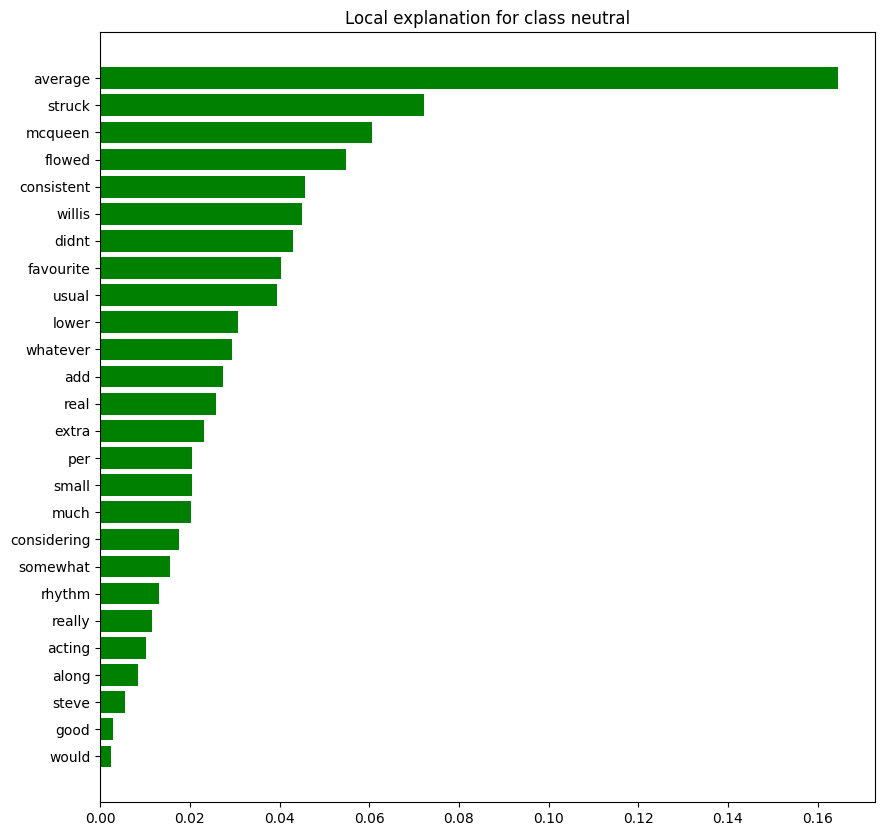

In [ ]:
import matplotlib.pyplot as plt

ex = exp.as_list(label=predicted_label)
ex = [(word, weight) for word, weight in ex if weight > 0]
fig = plt.figure(figsize=(10,10))
vals = [x[1] for x in ex]
names = [x[0] for x in ex]
vals.reverse()
names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = np.arange(len(ex)) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
title = 'Local explanation for class ' + classes[predicted_label]
plt.title(title)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=predicted_label)
plt.show()

In [ ]:
exp.show_in_notebook(labels=[predicted_label], show_predicted_value=True)

### Bi-LSTM

In [ ]:
def predict_prob(texts):
    text_cleaned = clean_data(texts)
    test_data = tokenizer.texts_to_sequences(text_cleaned)
    padded_test_data = pad_sequences(test_data, maxlen=max_length, truncating='post', padding='post')
    preds = imdb_model.predict(padded_test_data)
    return preds

In [ ]:
sentence = "i really love the movie"

exp = explainer.explain_instance(
    sentence,
    predict_prob, labels=(0,1,2), num_features=len(sentence.split(' ')))
exp.available_labels()

In [ ]:
predicted_label = np.argmax(predict_prob(["i really love the movie"]))
predicted_label

In [ ]:
exp.as_list(label=predicted_label)

In [ ]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure(label=predicted_label)
plt.show()

In [ ]:
exp.show_in_notebook(labels=[predicted_label], show_predicted_value=True)